In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect('/home/inshad/Downloads/Project 5-- Amazon Customers Data Analysis-20221214T080727Z-001/Project 5--_ Amazon Customers Data Analysis/database.sqlite')

In [4]:
df = pd.read_sql_query('SELECT * FROM Reviews',con)

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [8]:
df.duplicated().sum()

0

### Sentiment Analysis using Textblob

In [9]:
from textblob import TextBlob

In [10]:
df['Summary'][0]

'Good Quality Dog Food'

In [11]:
df['Summary'][540]

'Not the Best'

In [12]:
TextBlob(df['Summary'][0]).sentiment.polarity

0.7

#### We will perform polarity on Summary column

In [13]:
Polarity = []
for item in df['Summary']:
    try:
        Polarity.append(TextBlob(item).sentiment.polarity)
    except:
        Polarity.append(0)

In [14]:
df['Polarity'] = Polarity

In [15]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


####  Now we will distinguish positive and negative reviews based on the polarity. Higher the polarity, postive the review is and lower the polarity negative the review is.

In [16]:
data_positive = df[df['Polarity']>0]
data_negative = df[df['Polarity']<0]

### EDA for positive reviews

In [17]:
total_positive_text = (" ".join(data_positive['Summary']))
total_positive_text[0:300]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET '

#### Inorder to make wordcloud image, we will remove all non-alphabets from the total postive text

In [18]:
from wordcloud import WordCloud,STOPWORDS

In [19]:
import re

In [20]:
total_positive_text = re.sub(r'[^a-zA-z0-9]',' ',total_positive_text)
total_positive_text[0:300]

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET '

In [21]:
total_positive_text = re.sub(' +',' ',total_positive_text)

(-0.5, 999.5, 599.5, -0.5)

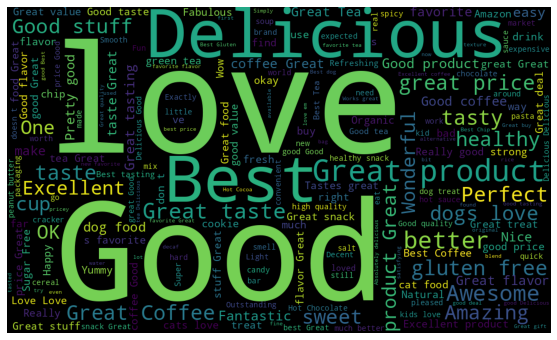

In [22]:
wordcloud_positive = WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(total_positive_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_positive)
plt.axis('off')

### EDA for negative reviews

In [23]:
total_negative_text = (" ".join(data_negative['Summary']))
total_negative_text[0:300]

"poor taste Nasty No flavor How can you go wrong! pretty expensive stale product. Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS! Tasteless but low calorie Marley's Mellow Mood Lite - Half Tea Half Lemonade Nearly killed the cats CHA"

In [24]:
total_negative_text = re.sub(r'[^a-zA-Z0-9]',' ',total_negative_text)

In [25]:
total_negative_text = re.sub(' +',' ',total_negative_text)
total_negative_text[0:300]

'poor taste Nasty No flavor How can you go wrong pretty expensive stale product Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS Tasteless but low calorie Marley s Mellow Mood Lite Half Tea Half Lemonade Nearly killed the cats CHANGED '

In [26]:
total_negative_text = re.sub('good',' ',total_negative_text)
total_negative_text = re.sub('Tasty',' ',total_negative_text)
total_negative_text = re.sub(' +',' ',total_negative_text)

(-0.5, 999.5, 599.5, -0.5)

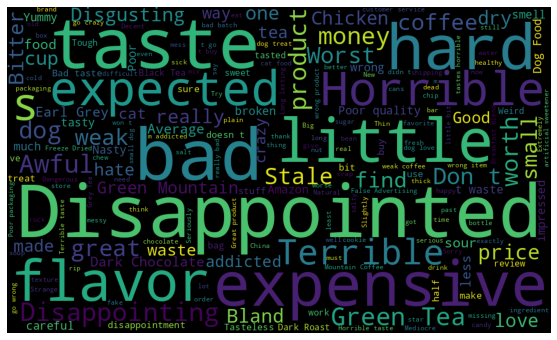

In [27]:
wordcloud_negative = WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(total_negative_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_negative)
plt.axis('off')

### EDA for Business analytics

In [28]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0


### We will extract the top users and we can recommend more products to the users who are frequent buyers

In [29]:
# we have this much unique users
df['UserId'].nunique()

256059

In [30]:
top_customers = df.groupby('UserId').agg({'ProductId':'count','Score':'mean','Summary':'count','Text':'count'}).sort_values(by='ProductId',ascending=False)
top_customers.columns=['no_of_products','Avg_rating','no_of_summary','no_of_reviews']
top_customers

,no_of_products,Avg_rating,no_of_summary,no_of_reviews
UserId,,,,
A3OXHLG6DIBRW8,448,4.535714,448,448
A1YUL9PCJR3JTY,421,4.494062,421,421
AY12DBB0U420B,389,4.647815,389,389
A281NPSIMI1C2R,365,4.841096,365,365
A1Z54EM24Y40LL,256,4.453125,256,256
...,...,...,...,...
A2HROKQO0GA5AF,1,3.000000,1,1
A2HROR28DMJV2W,1,5.000000,1,1
A2HRR8CO2Y20G8,1,5.000000,1,1


In [31]:
# top 10 users and their no:of products purchased

In [32]:
top_10_customers = top_customers[0:10].index

In [33]:
prod_top_10 = top_customers['no_of_products'][0:10]

<AxesSubplot:xlabel='UserId', ylabel='no_of_products'>

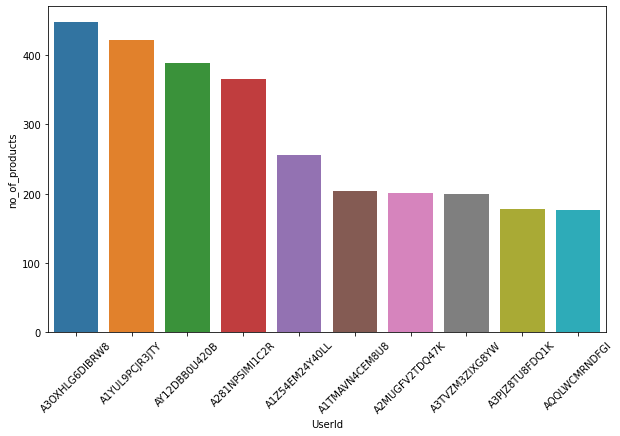

In [34]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(x=top_10_customers,y=prod_top_10)

### There is a high probability for these customer ids to purchase again and therefore recommend more products to these customers

## Visualization of overall rating of the product purchased

<AxesSubplot:xlabel='Score', ylabel='count'>

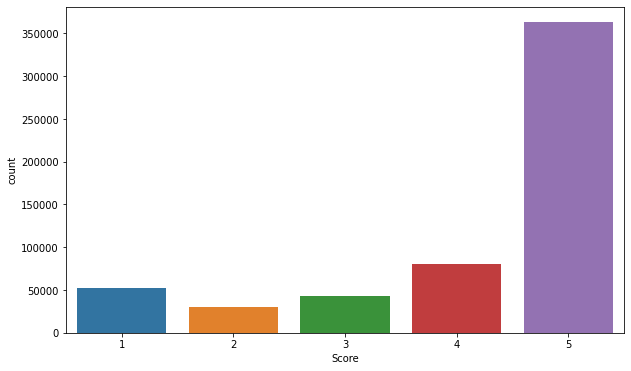

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Score'])

## Visualization of  the length of the reviews posted by customers

In [36]:
lowest_score = df[df['Score']==1]
highest_score = df[df['Score']==5]

In [37]:
lowest_score.reset_index(inplace=True)
highest_score.reset_index(inplace=True)

In [38]:
lowest_score.head(2)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.000000
1,12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,0.136364


In [39]:
len(lowest_score['Text'][0].split(' '))


31

In [40]:
def calc_length(col):
    return len(col.split(' '))

In [41]:
lowest_score['text_length'] = lowest_score['Text'].apply(calc_length)

/home/inshad/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
highest_score['text_length_positive'] = highest_score['Text'].apply(calc_length)

/home/inshad/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='text_length'>

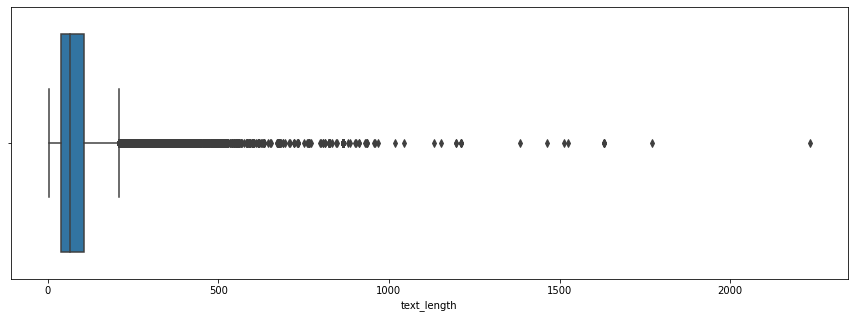

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(x=lowest_score['text_length'],data=lowest_score)

<AxesSubplot:xlabel='text_length_positive'>

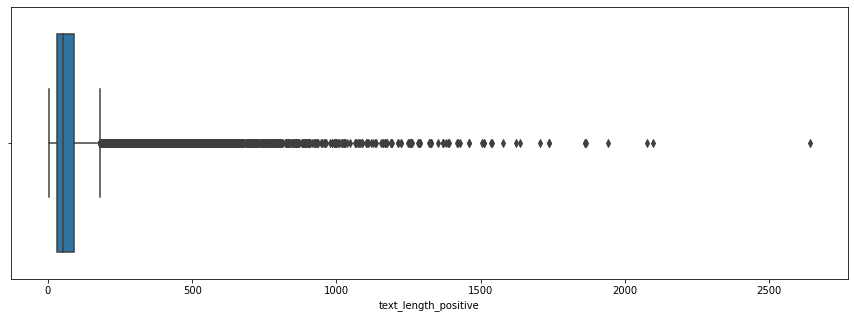

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(x=highest_score['text_length_positive'],data=highest_score)

## Word Cloud Visualization for random sample data

In [45]:
random_data = df.sample(n=1000)
random_data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
284671,284672,B001P3NU4E,ANX9YYM0EY3AD,Craig Witkowski,0,3,5,1337990400,"CET Chews are great, Amazon, not so great",The CET chews are fantastic in keeping my cat'...,0.8
365726,365727,B00032ANFC,A2FRFAQCWZJT3Q,"B. Davis ""The Happy Hermit""",0,0,5,1283299200,Best Soy Milk,I use two cartons a week and love it. It's cr...,1.0


In [46]:
random_data.reset_index(inplace=True)

In [47]:
random_data.Text.iloc[0]

'The CET chews are fantastic in keeping my cat\'s teeth clean.  However Amazon has buckled under to a group called "Color of Change" with is a race-centered extreme leftist group that is extorting companies to drop affiliation with a business group called ALEC (American Legislative Exchange Council).  Color of Change was founded by Van Jones, an avowed radical with a race-based agenda that has been exposed by his own words caught on tape.  Caving in to such race-based political groups that oppose the free market system is a losing proposition and is a sure way to lose customers such as myself.  My latest purchase of these CET chews tonight was not made at Amazon but at another company. Amazon needs to disassociate itself from race-based hate groups and re-join with ALEC to support the free market.'

In [48]:
import string
punctuations_ = string.punctuation

In [49]:
random_data['Text'] = random_data['Text'].str.lower()

In [50]:
def remove_punctuations(txt):
    no_punc = ' '
    for i in txt:
        if i not in punctuations_:
            no_punc = no_punc + i
    return no_punc        

In [51]:
random_data['Text'] = random_data['Text'].apply(remove_punctuations)

In [52]:
random_data.Text.iloc[0]

' the cet chews are fantastic in keeping my cats teeth clean  however amazon has buckled under to a group called color of change with is a racecentered extreme leftist group that is extorting companies to drop affiliation with a business group called alec american legislative exchange council  color of change was founded by van jones an avowed radical with a racebased agenda that has been exposed by his own words caught on tape  caving in to such racebased political groups that oppose the free market system is a losing proposition and is a sure way to lose customers such as myself  my latest purchase of these cet chews tonight was not made at amazon but at another company amazon needs to disassociate itself from racebased hate groups and rejoin with alec to support the free market'

In [53]:
import nltk
from nltk.corpus import stopwords

In [54]:
[word for word in random_data['Text'][0].split(" ") if word not in set(stopwords.words('english'))]

['',
 'cet',
 'chews',
 'fantastic',
 'keeping',
 'cats',
 'teeth',
 'clean',
 '',
 'however',
 'amazon',
 'buckled',
 'group',
 'called',
 'color',
 'change',
 'racecentered',
 'extreme',
 'leftist',
 'group',
 'extorting',
 'companies',
 'drop',
 'affiliation',
 'business',
 'group',
 'called',
 'alec',
 'american',
 'legislative',
 'exchange',
 'council',
 '',
 'color',
 'change',
 'founded',
 'van',
 'jones',
 'avowed',
 'radical',
 'racebased',
 'agenda',
 'exposed',
 'words',
 'caught',
 'tape',
 '',
 'caving',
 'racebased',
 'political',
 'groups',
 'oppose',
 'free',
 'market',
 'system',
 'losing',
 'proposition',
 'sure',
 'way',
 'lose',
 'customers',
 '',
 'latest',
 'purchase',
 'cet',
 'chews',
 'tonight',
 'made',
 'amazon',
 'another',
 'company',
 'amazon',
 'needs',
 'disassociate',
 'racebased',
 'hate',
 'groups',
 'rejoin',
 'alec',
 'support',
 'free',
 'market']

In [55]:
def remov_stopwords(review):
    return " ".join([word for word in review.split(" ") if word not in set(stopwords.words('english'))])

In [56]:
random_data['Text'] = random_data['Text'].apply(remov_stopwords)

In [57]:
comment_words = ' '.join(random_data['Text'])

(-0.5, 999.5, 499.5, -0.5)

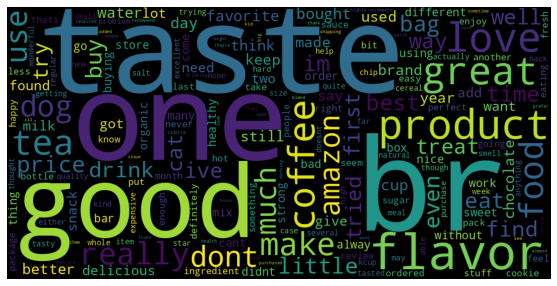

In [59]:
word_cloud = WordCloud(width=1000,height=500,stopwords=STOPWORDS).generate(comment_words)
plt.figure(figsize=(10,5))
plt.imshow(word_cloud)
plt.axis('off')